# Analiza rzutu ukośnego

In [2]:
using Plots

In [6]:
# dane
g = 9.81
m = 2
v₀ = 30
α = π / 4
# obliczenia
hₘ = ((v₀ * sin(α))^ 2) / (2 * g) # maksymalna wysokość
czas = (2 * v₀ * sin(α)) / g
#z = (v₀ ^ 2 * sin(2 * α)) / g # zasięg

4.324812117348913

# 1. Bez uwzględnienia oporów powietrza

Układ równań opisujących tor obiektu w rzucie ukośnym z oporem powietrza:

$$x(t)=(v_o\cos{\alpha})t $$

$$y(t)=(v_o\sin{\alpha})t-\frac{1}{2}gt^2$$

$$v_x(t)=v_o\cos{\alpha}$$

$$v_y(t)=v_o\sin{\alpha} - gt$$

In [7]:
function x(v₀, α)
    t -> v₀ * t * cos(α)
end

function y(v₀, α, g)
    t -> v₀ * t * sin(α) - (g * t ^ 2) / 2
end

function v_x(v₀, α)
    t -> v₀ * cos(α)
end

function v_y(v₀, α, g)
    t -> v₀ * sin(α) - g * t
end

v_y (generic function with 1 method)

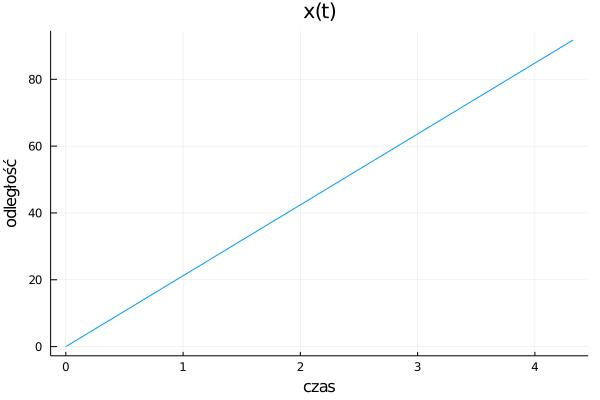

In [277]:
plot(x(v₀, α), 0, czas,
    xlabel = "czas", 
    ylabel = "odległość",
    legend =:none,
    title = "x(t)")

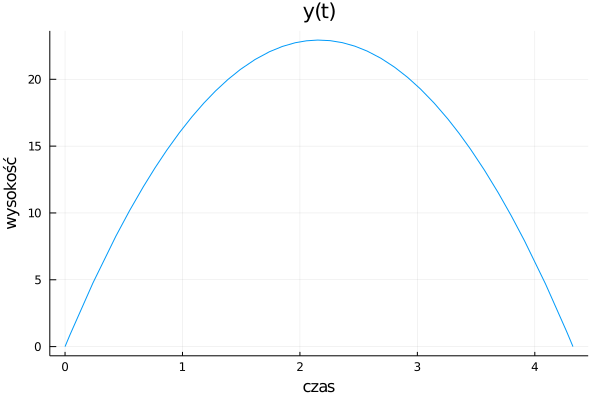

In [279]:
plot(y(v₀, α, g), 0, czas,
    xlabel = "czas", 
    ylabel = "wysokość", 
    legend =:none,
    title = "y(t)")
### dodac maksimum

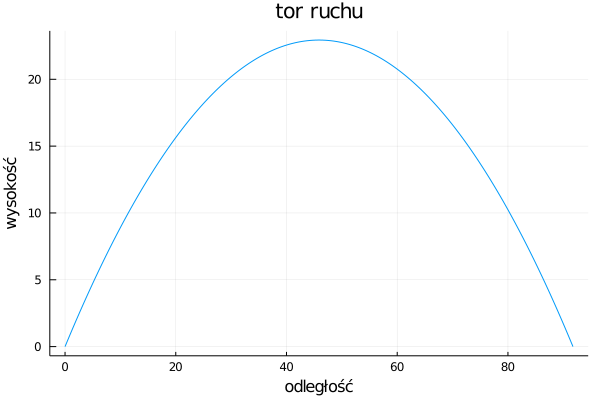

In [282]:
#krzywa paraboliczna
plot(x(v₀, α), y(v₀, α, g), 0, czas,
    xlabel = "odległość", 
    ylabel = "wysokość",
    legend =:none,
    title = "tor ruchu")

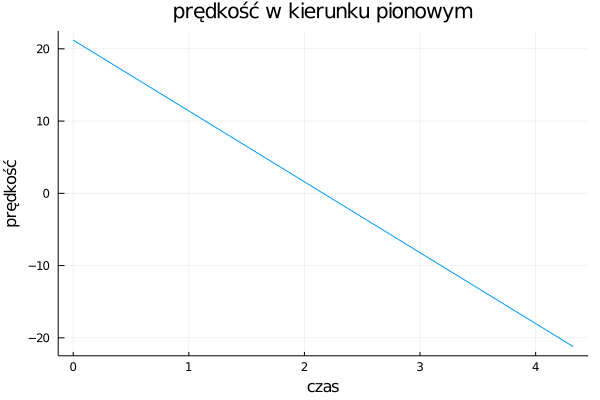

In [283]:
plot(v_y(v₀, α, g), 0, czas,
    xlabel = "czas", 
    ylabel = "prędkość",
    legend =:none,
    title = "prędkość w kierunku pionowym")

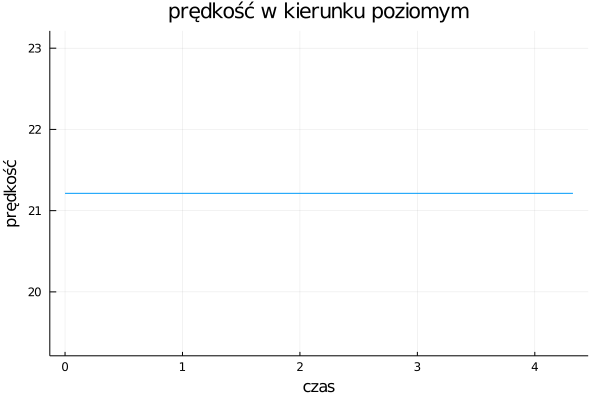

In [284]:
plot(v_x(v₀, α), 0, czas,
    xlabel = "czas", 
    ylabel = "prędkość",
    ylim = (v₀ * cos(α) - 2, v₀ * cos(α) + 2),
    legend =:none,
    title = "prędkość w kierunku poziomym")

# 2. Z uwzględnieniem oporów powietrza

In [13]:
#Dane:
k = 0.5 #współczynnik oporu
#czas_opor = (g * m * (exp(-(k * v₀ * sin(α)) / (g * m) - 1) * (-(k * v₀ * sin(α)) / (g * m) - 1)) + (k * v₀ * sin(α)) + (g * m)) / (g * k)

4.842097084495544

# a) rozwiązanie analityczne

Układ równań opisujących tor obiektu w rzucie ukośnym z oporem powietrza:

$$x(t)=(\frac{m}{k}v_o\cos{\alpha})(1-e^{\frac{-k}{m}{t}}) $$

$$y(t)=(\frac{m}{k}v_o\sin{\alpha}+\frac{m^{2}}{k^{2}}g)(1-e^{\frac{-k}{m}{t}})-\frac{m}{k}gt$$

In [15]:
function x_opor(m, k, v₀, α)
    t -> m / k * v₀ * cos(α) * (1 - exp((-k / m) * t))
end

function y_opor(m, k, v₀, α, g)
    t -> (m / k * v₀ * sin(α) + (m / k)^2 * g) * (1 - exp((-k / m) * t)) - (m / k) * g * t
end

y_opor (generic function with 1 method)

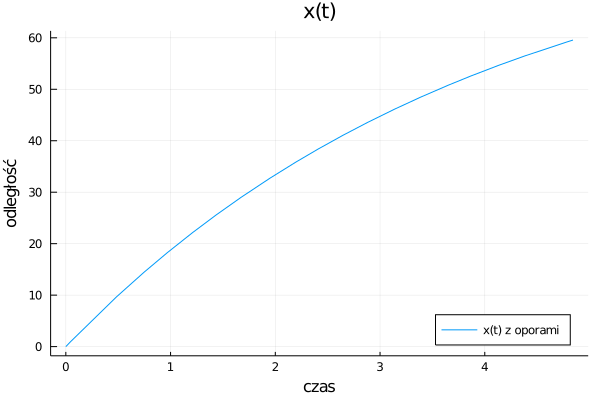

In [18]:
plot(x_opor(m, k, v₀, α), 0, czas,
    xlabel = "czas", 
    ylabel = "odległość", 
    label = "x(t) z oporami",
    legend =:bottomright,
    title = "x(t)")

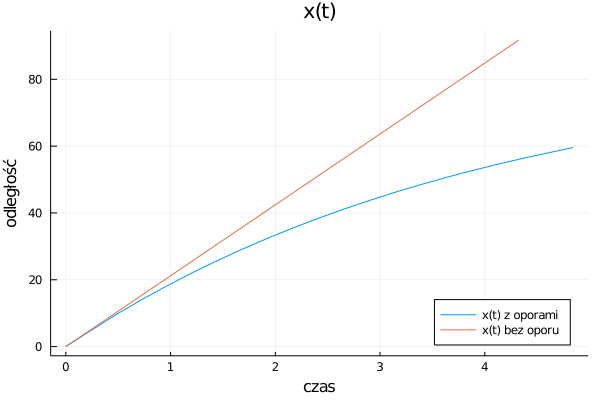

In [19]:
plot!(x(v₀, α), 0, czas,
    label = "x(t) bez oporu")

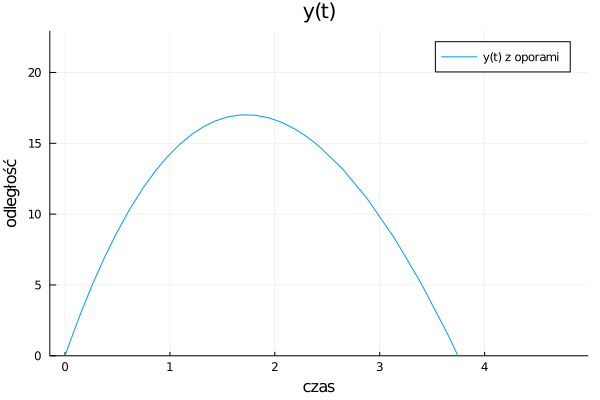

In [20]:
plot(y_opor(m, k, v₀, α, g), 0, czas,
    xlabel = "czas", 
    ylabel = "odległość", 
    label = "y(t) z oporami",
    legend =:topright,
    ylim = (0, hₘ),
    title = "y(t)")

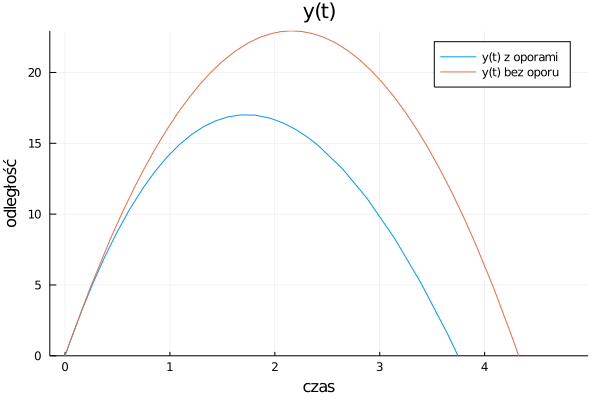

In [21]:
plot!(y(v₀, α, g), 0, czas,
    label = "y(t) bez oporu")

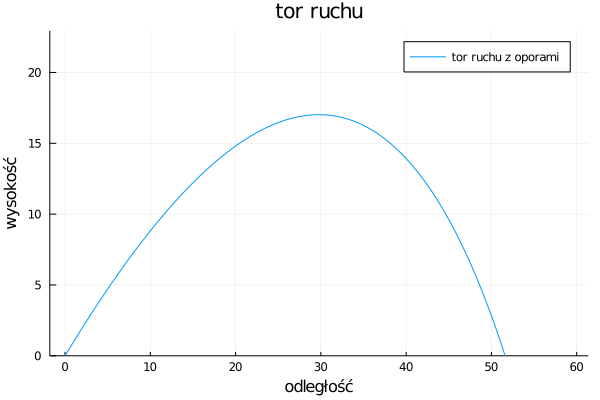

In [23]:
#krzywa balistyczna
plot(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g), 0, czas,
    xlabel = "odległość", 
    ylabel = "wysokość",
    label = "tor ruchu z oporami",
    legend =:topright,
    ylim = (0, hₘ),
    title = "tor ruchu")

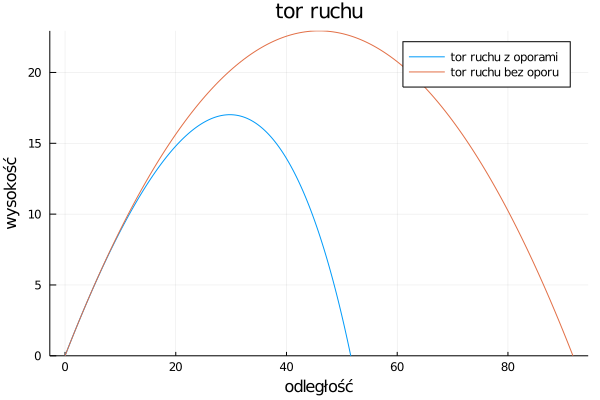

In [24]:
plot!(x(v₀, α), y(v₀, α, g), 0, czas,
    label = "tor ruchu bez oporu")

# b) rozwiązanie numeryczne

Koszt obliczeń rozwiązania analitycznygeo może być zbyt duży, z uwagi na występowanie funkcji exp(). Rozwiązanie numeryczne jest bardziej wydajne. Metody numeryczne pozwalają otrzymać zadowalający wynik, minimalnie różniący się od otrzymanego metodami analitycznymi.

# 3. Z uwzględnieniem siły Magnusa

In [58]:
# dane
g = 9.81
m = 0.045
v₀ = 35
α = π / 9
p = 1.2 #gęstość powietrza
n = -20 #liczba obrotów na sekundę
r = 0.02 #promień
hₘ = ((v₀ * sin(α))^ 2) / (2 * g) # maksymalna wysokość
czas = (2 * v₀ * sin(α)) / g

2.440510706707116

Wzór na siłę Magnusa dla wirującej kuli:

$$ F=2npv_o \pi^2 r^3$$

Układ równań opisujących tor obiektu w rzucie ukośnym z siłą Magnusa:

$$x(t)=(v_o\cos{\alpha})t $$

$$y(t)=(v_o\sin{\alpha})t-(g-\frac{F}{m})\frac{t^2}{2}$$


In [59]:
F = 2 * n * p * v₀ * pi ^ 2 * r ^ 3
czas_magnus = (2 * v₀ * sin(α)) / (g - (F / m))

1.8766211019830585

In [46]:
function x_magnus(v₀, α)
    t -> v₀ * t * cos(α)
end

function y_magnus(v₀, α, g)
    t -> v₀ * t * sin(α) - (g - (F / m))*(t ^ 2)/2
end

y_magnus (generic function with 1 method)

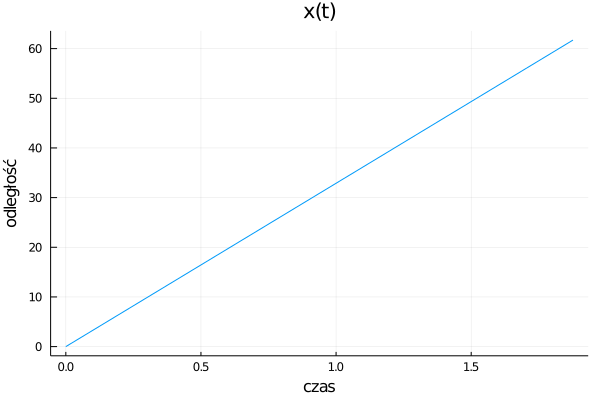

In [60]:
plot(x_magnus(v₀, α), 0, czas_magnus,
    xlabel = "czas", 
    ylabel = "odległość",
    legend =:none,
    title = "x(t)")

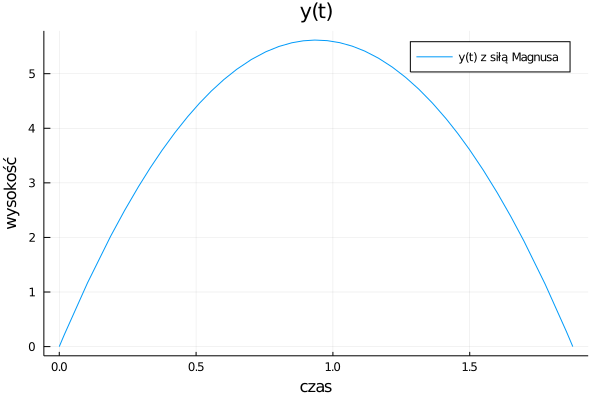

In [61]:
plot(y_magnus(v₀, α, g), 0, czas_magnus,
    xlabel = "czas", 
    ylabel = "wysokość", 
    legend =:topright,
    label = "y(t) z siłą Magnusa",
    title = "y(t)")

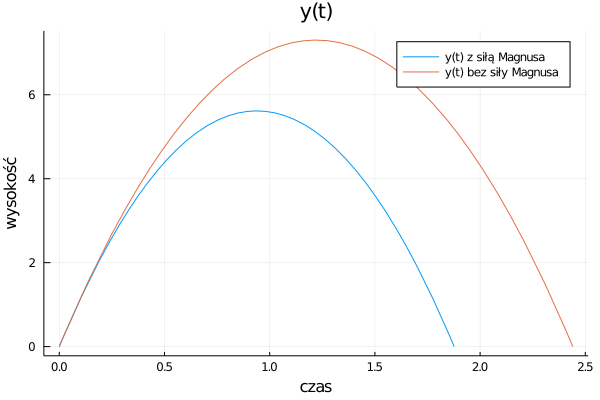

In [62]:
plot!(y(v₀, α, g), 0, czas,
    label = "y(t) bez siły Magnusa")

Dodatnia siła Magnusa wydłuża zasięg toru lotu piłki, a ujemna go skraca. Rotacja dodatnia powoduje dodatnią siłę, analogicznie ujemna powoduje ujemną. Zgodnie z umową, dodatnia wartość obrotu występuje wtedy, gdy punkt na dolnej część powierzchni kuli oddala się od obserwatora. Ujemny obrót występuje wtedy, gdy ten punkt przemieszcza się w kierunku gracza.

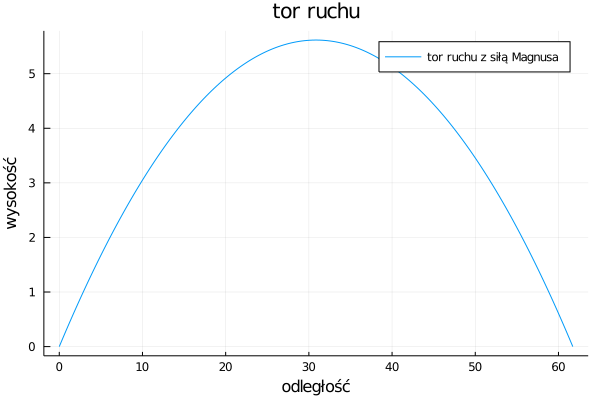

In [63]:
plot(x_magnus(v₀, α), y_magnus(v₀, α, g), 0, czas_magnus,
    xlabel = "odległość", 
    ylabel = "wysokość",
    legend =:topright,
    label = "tor ruchu z siłą Magnusa",
    title = "tor ruchu")

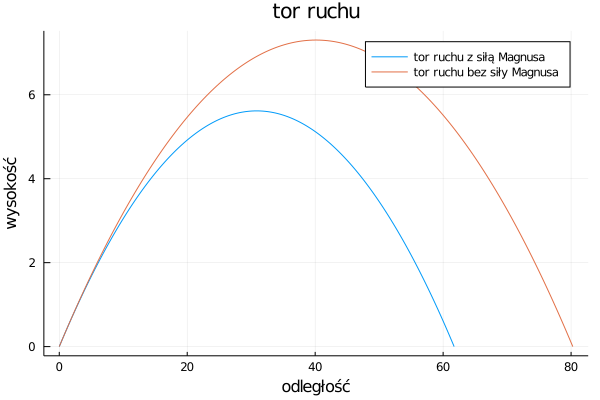

In [64]:
plot!(x(v₀, α), y(v₀, α, g), 0, czas,                  
    label = "tor ruchu bez siły Magnusa")